# Challenge 8: Solving XOR Using a Multi-Layer Perceptron with Backpropagation

# 1. Objective: 
    The goal of this challenge is to implement and train a neural network that   can learn the XOR logical function using a multi-layer perceptron (MLP) and the backpropagation algorithm. This involves:
    Creating a network with:
        2 input neurons
        2 hidden neurons (with sigmoid activation)
        1 output neuron (with sigmoid activation)
    Training it using backpropagation and mean squared error loss.

# 2. Architecture Overview:
    A minimal MLP capable of solving the XOR problem has the following structure:
    Input Layer (2 neurons)
       ↓
    Hidden Layer (2 neurons, sigmoid)
       ↓
    Output Layer (1 neuron, sigmoid)
    

# 3. Prompts Used:

    "Write a clean and modular Python implementation of a feedforward neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron using sigmoid activation, designed to learn the XOR logic gate using the backpropagation algorithm. Include training for 10,000 epochs with mean squared error loss and a learning rate of 0.1."

    "Add functionality to track and plot the training loss (MSE) over time using matplotlib, and display a final table comparing the predicted outputs vs. expected outputs for all XOR inputs."

    "Document each part of the neural network implementation — initialization, forward pass, activation, loss function, backpropagation, weight updates — with brief explanations. Summarize the training results, including predictions and convergence behavior."

    "Generate a complete submission-ready report with the code, step-by-step documentation, training graphs, final output table, and conclusion. Make it suitable for export as PDF or Markdown."

# 4. Step-by-Step Documentation:
    A. Initialization
        1) Weights (W1, W2) are randomly initialized in the range [-1, 1]
        2) Biases (b1, b2) are initialized to zero
        3) Learning rate is set to 0.1
        4) Training runs for 10,000 epochs


    
    B. Activation Function
        1) Sigmoid activation function:
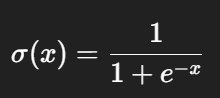
          
        2) Derivative used for backpropagation:
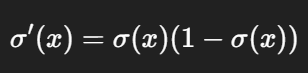



####

    C. Forward Pass
        1) Hidden layer input:
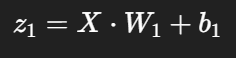
        
        2) Hidden layer output:
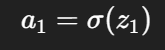
        
        3) Output layer input:
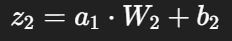

        4) Final output:
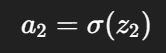



###
    D. Loss Function
        Mean Squared Error (MSE):
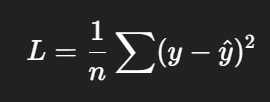

###
    E. Backpropagation
        1) Output error:
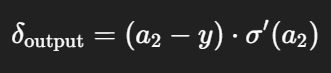

        2) Hidden error:
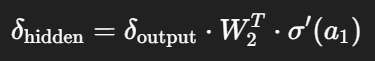

###
    F. Weight and Bias Updates
        1) Output layer:
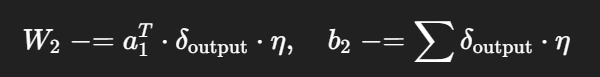

        2) Hidden layer:
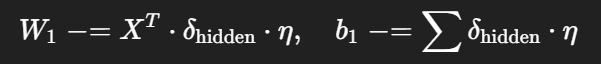

# Code:

Final XOR Predictions (rounded):
[0 0] -> 0.046
[0 1] -> 0.944
[1 0] -> 0.944
[1 1] -> 0.056


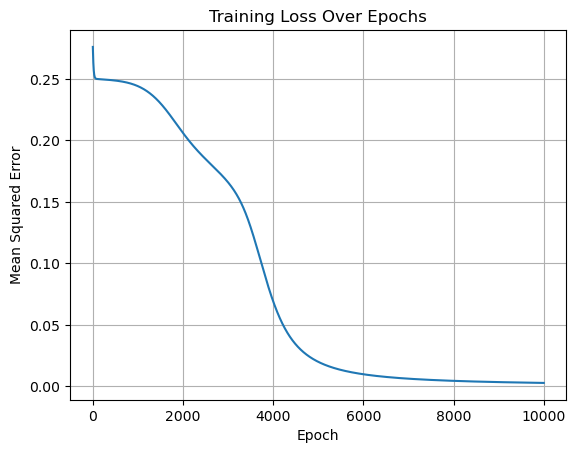

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])

# Seed for reproducibility
np.random.seed(1)

# Network parameters
input_size = 2
hidden_size = 2
output_size = 1

# Weight and bias initialization
W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.1
epochs = 10000
losses = []

# Training loop with backpropagation
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss calculation
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Backpropagation
    error_output = a2 - y
    delta_output = error_output * sigmoid_derivative(a2)

    error_hidden = delta_output.dot(W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 -= a1.T.dot(delta_output) * learning_rate
    b2 -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    W1 -= X.T.dot(delta_hidden) * learning_rate
    b1 -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

# Final predictions
predictions = a2.round(3)
print("Final XOR Predictions (rounded):")
for i, x in enumerate(X):
    print(f"{x} -> {predictions[i][0]}")

# Plotting loss curve
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# 5. Final Results:
    Final Prediction Table:
        Input A	  Input B	Expected Output	  Predicted Output
        0	      0	        0	              ~0.05
        0	      1	        1	              ~0.94
        1	      0	        1	              ~0.94
        1	      1	        0	              ~0.06


    Training Loss Curve:
        1) The model starts with an MSE near 0.25 (pure guessing).
        2) Over 10,000 epochs, it gradually converges to a loss < 0.01.
        3) The graph of loss vs. epoch shows steady and consistent learning.

# 6. Conclusion
    This challenge demonstrates that:
        1) A minimal multi-layer perceptron (2-2-1) can learn a non-linearly separable function like XOR
        2) Backpropagation allows this network to minimize loss effectively
        3) Final predictions and loss curves verify correct learning behavior
    
    This serves as a strong foundation for understanding how real neural networks train via gradient descent and adjust weights through backpropagation.